In [26]:
import pandas as pd
import os
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [20]:
#setting working directory

working_directory = '/Users/szemin/Documents/DAC csv files/DAC project working directory'

os.chdir(working_directory)

In [6]:
#reading files and import data
df_customer = pd.read_csv('/Users/szemin/Documents/DAC csv files/customer_trend.csv')

df_customer.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Data Cleaning

In [7]:
result = df_customer[(df_customer['Discount Applied'] == 'No') & (df_customer['Promo Code Used'] == 'Yes')]
print(result)

result2 = df_customer[(df_customer['Discount Applied'] == 'Yes') & (df_customer['Promo Code Used'] == 'No')]
print(result2)

# hence the above code shows that we found no difference between discount applied and promo code used, hence we will drop promo code used and keep discount applied.

Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []


In [8]:
#check is there any duplicated value, True: duplicate/ False: no duplicates
duplicates = df_customer.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3900, dtype: bool


In [9]:
#finding the number of duplicated values
df_customer.duplicated().sum()
# hence there is no duplicates to remove

0

In [10]:
#check the data type
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [11]:
#if there are null values
df_customer.isnull().sum()
# there is no null values in this dataset

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [12]:
# drop unnecessary columns that are not needed in this approach
df_customer.drop(['Customer ID', 'Gender', 'Item Purchased', 'Category', 'Size', 'Color', 'Review Rating', 'Subscription Status', 'Promo Code Used', 'Previous Purchases'], axis=1, inplace=True)
df_customer

,Age,Purchase Amount (USD),Location,Season,Shipping Type,Discount Applied,Payment Method,Frequency of Purchases
0,55,53,Kentucky,Winter,Express,Yes,Venmo,Fortnightly
1,19,64,Maine,Winter,Express,Yes,Cash,Fortnightly
2,50,73,Massachusetts,Spring,Free Shipping,Yes,Credit Card,Weekly
3,21,90,Rhode Island,Spring,Next Day Air,Yes,PayPal,Weekly
4,45,49,Oregon,Spring,Free Shipping,Yes,PayPal,Annually
...,...,...,...,...,...,...,...,...
3895,40,28,Virginia,Summer,2-Day Shipping,No,Venmo,Weekly
3896,52,49,Iowa,Spring,Store Pickup,No,Bank Transfer,Bi-Weekly
3897,46,33,New Jersey,Spring,Standard,No,Venmo,Quarterly
3898,44,77,Minnesota,Summer,Express,No,Venmo,Weekly


In [13]:
# Mapping 'Yes' to 1 and 'No' to 0 in the 'Discount Applied' column
df_customer['Discount Applied'] = df_customer['Discount Applied'].replace({'Yes': 1, 'No': 0})
df_customer

,Age,Purchase Amount (USD),Location,Season,Shipping Type,Discount Applied,Payment Method,Frequency of Purchases
0,55,53,Kentucky,Winter,Express,1,Venmo,Fortnightly
1,19,64,Maine,Winter,Express,1,Cash,Fortnightly
2,50,73,Massachusetts,Spring,Free Shipping,1,Credit Card,Weekly
3,21,90,Rhode Island,Spring,Next Day Air,1,PayPal,Weekly
4,45,49,Oregon,Spring,Free Shipping,1,PayPal,Annually
...,...,...,...,...,...,...,...,...
3895,40,28,Virginia,Summer,2-Day Shipping,0,Venmo,Weekly
3896,52,49,Iowa,Spring,Store Pickup,0,Bank Transfer,Bi-Weekly
3897,46,33,New Jersey,Spring,Standard,0,Venmo,Quarterly
3898,44,77,Minnesota,Summer,Express,0,Venmo,Weekly


### Visualisations

How is Age and Payment Method used related?

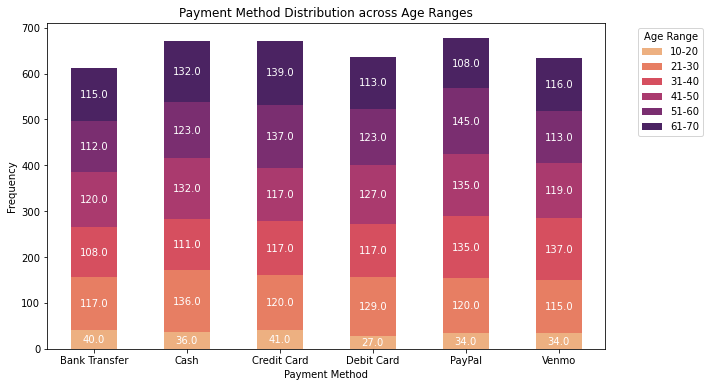

In [48]:
# Define age ranges
bins = [10, 20, 30, 40, 50, 60, 70]  # Define your age ranges here
labels = ['10-20','21-30', '31-40', '41-50', '51-60','61-70']  # Labels for the age ranges

# Create a new column 'Age Range' based on the defined bins
df_customer['Age Range'] = pd.cut(df_customer['Age'], bins=bins, labels=labels)

# Create a pivot table to count occurrences of Payment Method in each Age Range
pivot_df = df_customer.groupby(['Payment Method','Age Range']).size().unstack()

# Plotting the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='flare')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Payment Method Distribution across Age Ranges')
plt.legend(title='Age Range')

# Move legend outside the plot to the right to prevent blocking the bar chart
plt.legend(title='Age Range', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels to horizontal
plt.xticks(rotation=0)

# Add value labels for each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')


plt.show()

/var/folders/v6/cm8bgvgx7vq6m1sghl7nhr140000gn/T/ipykernel_97356/1487552924.py:6: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df_customer['Frequency of Purchases'].cat.reorder_categories(desired_order, inplace=True)


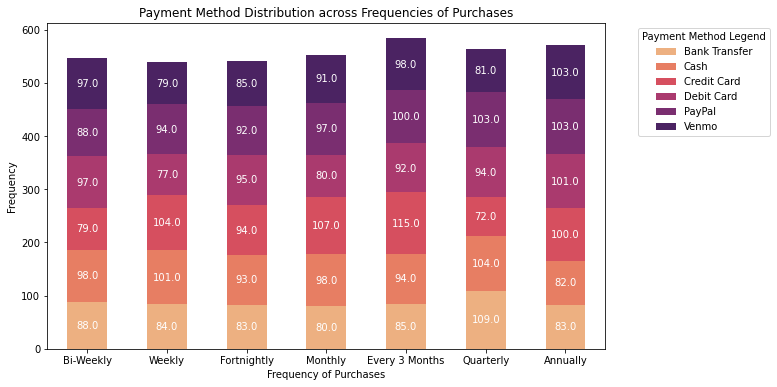

In [41]:

# Define the desired order for the x-axis categories
desired_order = ['Bi-Weekly','Weekly', 'Fortnightly', 'Monthly', 'Every 3 Months', 'Quarterly', 'Annually']  # Replace with your desired order

# Reorder the categories in the DataFrame column
df_customer['Frequency of Purchases'] = df_customer['Frequency of Purchases'].astype('category')
df_customer['Frequency of Purchases'].cat.reorder_categories(desired_order, inplace=True)


# Create a pivot table to count occurrences of Payment Method in each Age Range
pivot_df = df_customer.groupby(['Frequency of Purchases', 'Payment Method']).size().unstack()

# Plotting the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='flare')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Frequency')
plt.title('Payment Method Distribution across Frequencies of Purchases')
plt.legend(title='Payment Method')

# Move legend outside the plot to the right to prevent blocking the bar chart
plt.legend(title='Payment Method Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels to horizontal
plt.xticks(rotation=0)

# Add value labels for each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')


plt.show()

Does shipping type varies across locations?

In [16]:
#create a new dataframe to extract just the location and shipping type
df_shipping = df_customer[['Location', 'Shipping Type', 'Frequency of Purchases']].copy()
df_shipping

,Location,Shipping Type,Frequency of Purchases
0,Kentucky,Express,Fortnightly
1,Maine,Express,Fortnightly
2,Massachusetts,Free Shipping,Weekly
3,Rhode Island,Next Day Air,Weekly
4,Oregon,Free Shipping,Annually
...,...,...,...
3895,Virginia,2-Day Shipping,Weekly
3896,Iowa,Store Pickup,Bi-Weekly
3897,New Jersey,Standard,Quarterly
3898,Minnesota,Express,Weekly


In [22]:
# to save the output of the new df_shipping dataframe as a csv file
df_shipping.to_csv('output.csv', index=False)

In [23]:
shipping_count = df_shipping['Shipping Type'].value_counts().reset_index()
shipping_count

,index,Shipping Type
0,Free Shipping,675
1,Standard,654
2,Store Pickup,650
3,Next Day Air,648
4,Express,646
5,2-Day Shipping,627


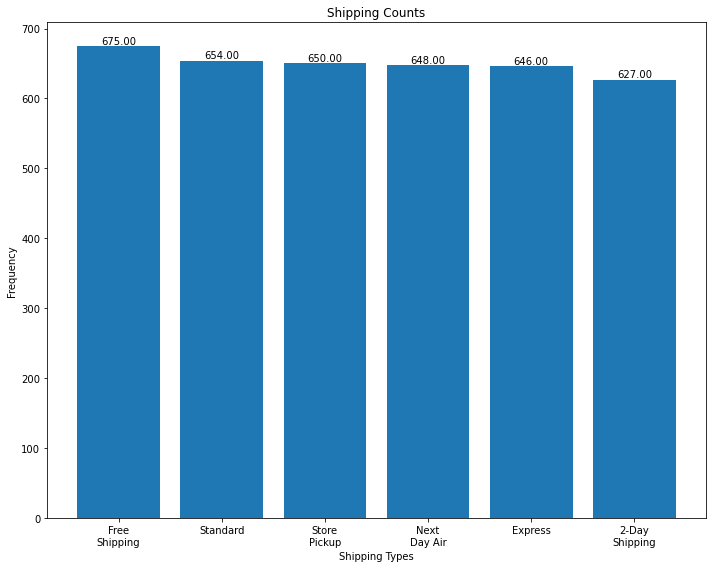

In [51]:
# Create a bar plot
plt.figure(figsize=(10, 8))
ax = plt.gca()
bars = plt.bar(shipping_count['index'], shipping_count['Shipping Type'])

# Define the word count threshold
word_count_threshold = 1  # Adjust this threshold as needed

# Function to split title based on word count threshold while preserving special characters
def split_title(title, threshold):
    words = title.split()
    if len(words) <= threshold:
        return title
    else:
        first_line = ' '.join(words[:threshold])
        second_line = ' '.join(words[threshold:])
        return f"{first_line}\n{second_line}"

# Customize the plot
plt.title('Shipping Counts')
plt.xlabel('Shipping Types')
plt.ylabel('Frequency')

# Set x-axis tick labels with line breaks for longer titles (based on word count threshold)
plt.xticks(range(len(shipping_count['index'])),
           [split_title(title, word_count_threshold) for title in shipping_count['index']],
           rotation=0)

# Adding value labels above each bar
for i, rect in enumerate(bars):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.2f}',
            ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
# Group by 'shipping type' and 'location' and count the frequencies
classification_count = df_shipping.groupby(['Shipping Type', 'Location']).size().reset_index(name='Shipping Type Frequencies')
classification_count

,Shipping Type,Location,Shipping Type Frequencies
0,2-Day Shipping,Alabama,16
1,2-Day Shipping,Alaska,13
2,2-Day Shipping,Arizona,10
3,2-Day Shipping,Arkansas,12
4,2-Day Shipping,California,14
...,...,...,...
295,Store Pickup,Virginia,11
296,Store Pickup,Washington,12
297,Store Pickup,West Virginia,15
298,Store Pickup,Wisconsin,11


In [58]:
# Sort by total attendance in ascending order and select top 10
top_10_attended = classification_count.sort_values('Shipping Type Frequencies', ascending=False).head(10)
top_10_attended


,Shipping Type,Location,Shipping Type Frequencies
262,Store Pickup,Illinois,24
125,Free Shipping,Montana,22
50,Express,Alabama,20
107,Free Shipping,Delaware,20
131,Free Shipping,New York,20
244,Standard,Vermont,20
118,Free Shipping,Maine,20
154,Next Day Air,California,20
167,Next Day Air,Louisiana,20
263,Store Pickup,Indiana,20


In [66]:
import requests

# Fetching GeoJSON data for US states
state_geo = requests.get("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json").json()

# Create a map centered at a specific location
us_map = folium.Map(location=[37, -95], zoom_start=4, tiles='cartodbpositron')

# Define marker colors for different shipping types
shipping_colors = {
    'Express': 'red',
    'Free Shipping': 'green',
    'Next Day Air': 'blue',
    'Standard': 'orange',
    'Store Pickup': 'purple',
    '2-Day Shipping': 'gray'
}

# Iterate through the DataFrame and GeoJSON data to link 'Location' to coordinates
for feature in state_geo['features']:
    state_name = feature['properties']['name']
    if state_name in df_shipping['Location'].tolist():
        # Find the corresponding location in DataFrame and get index
        index = df_shipping.index[df_shipping['Location'] == state_name].tolist()[0]

        # Get the shipping type for the state
        shipping_type = df_shipping.loc[index, 'Shipping Type']

        # Extracting coordinates from the GeoJSON file
        coordinates = feature['geometry']['coordinates']
        if feature['geometry']['type'] == 'Polygon':
            coordinates = [coordinates]  # Wrap in a list if it's a single polygon

        # Calculate the centroid of the state
        total_lat, total_lon, total_points = 0, 0, 0
        for poly in coordinates:
            for point in poly:
                if isinstance(point[0], list):
                    for p in point:
                        total_lat += p[1]
                        total_lon += p[0]
                        total_points += 1
                else:
                    total_lat += point[1]
                    total_lon += point[0]
                    total_points += 1

        latitude = total_lat / total_points
        longitude = total_lon / total_points

        # Create marker based on the coordinates and shipping type color
        folium.Marker(
            location=[latitude, longitude],
            popup=f"{state_name} - {shipping_type}",
            icon=folium.Icon(color=shipping_colors.get(shipping_type, 'gray'), icon='info-sign')
        ).add_to(us_map)

# Display the map
#us_map

# Save the map as an HTML file
us_map.save('map.html')

# Display the HTML file content
with open('map.html', 'r') as f:
    html_content = f.read()

from IPython.display import display, HTML
display(HTML(html_content))

In [34]:
state_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'AL',
   'properties': {'name': 'Alabama'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-87.359296, 35.00118],
      [-85.606675, 34.984749],
      [-85.431413, 34.124869],
      [-85.184951, 32.859696],
      [-85.069935, 32.580372],
      [-84.960397, 32.421541],
      [-85.004212, 32.322956],
      [-84.889196, 32.262709],
      [-85.058981, 32.13674],
      [-85.053504, 32.01077],
      [-85.141136, 31.840985],
      [-85.042551, 31.539753],
      [-85.113751, 31.27686],
      [-85.004212, 31.003013],
      [-85.497137, 30.997536],
      [-87.600282, 30.997536],
      [-87.633143, 30.86609],
      [-87.408589, 30.674397],
      [-87.446927, 30.510088],
      [-87.37025, 30.427934],
      [-87.518128, 30.280057],
      [-87.655051, 30.247195],
      [-87.90699, 30.411504],
      [-87.934375, 30.657966],
      [-88.011052, 30.685351],
      [-88.10416, 30.499135],
      [-88.137022, 30.318396],
    

are purchasing methods / shipping types affected by seasons?

In [28]:
df_customer

,Age,Purchase Amount (USD),Location,Season,Shipping Type,Discount Applied,Payment Method,Frequency of Purchases,Age Range
0,55,53,Kentucky,Winter,Express,1,Venmo,Fortnightly,50-59
1,19,64,Maine,Winter,Express,1,Cash,Fortnightly,10-19
2,50,73,Massachusetts,Spring,Free Shipping,1,Credit Card,Weekly,40-49
3,21,90,Rhode Island,Spring,Next Day Air,1,PayPal,Weekly,20-29
4,45,49,Oregon,Spring,Free Shipping,1,PayPal,Annually,40-49
...,...,...,...,...,...,...,...,...,...
3895,40,28,Virginia,Summer,2-Day Shipping,0,Venmo,Weekly,30-39
3896,52,49,Iowa,Spring,Store Pickup,0,Bank Transfer,Bi-Weekly,50-59
3897,46,33,New Jersey,Spring,Standard,0,Venmo,Quarterly,40-49
3898,44,77,Minnesota,Summer,Express,0,Venmo,Weekly,40-49


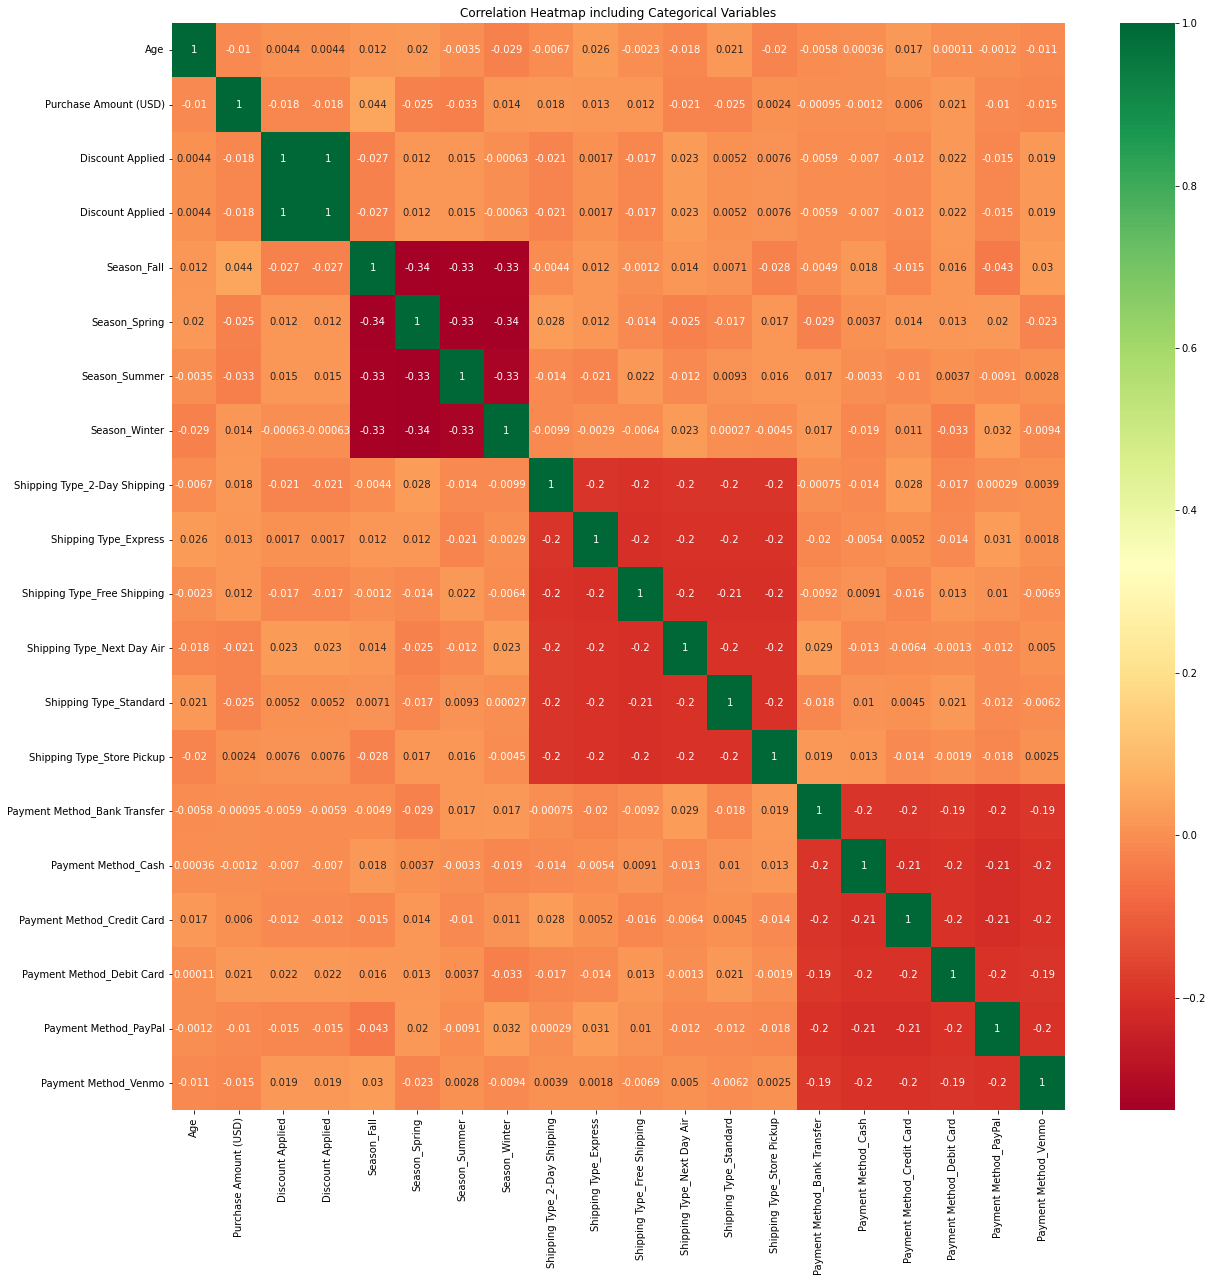

In [29]:
# Assuming df_customer contains your dataset with categorical variables
# Perform one-hot encoding for categorical variables
encoded_df = pd.get_dummies(df_customer[['Season', 'Shipping Type', 'Discount Applied', 'Payment Method']])

# Concatenate the encoded categorical variables with numerical columns
combined_df = pd.concat([df_customer.select_dtypes(include='number'), encoded_df], axis=1)

# Calculate the correlation matrix
corr_matrix = combined_df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")
plt.title('Correlation Heatmap including Categorical Variables')
plt.show()

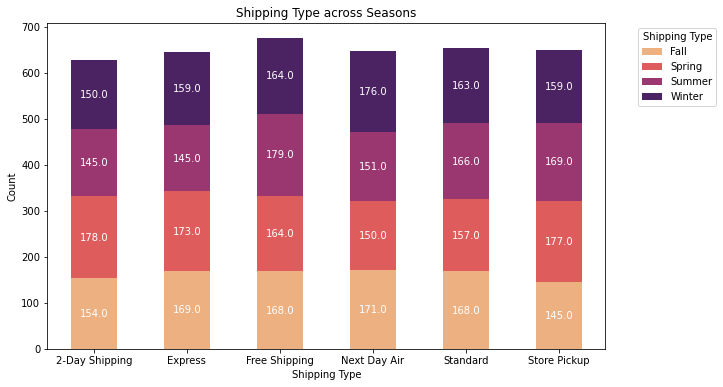

In [30]:
# Create a pivot table to count occurrences of Payment Method in each Age Range
pivot_df = df_customer.groupby(['Shipping Type', 'Season']).size().unstack()

# Plotting the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='flare')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.title('Shipping Type across Seasons')
plt.legend(title='Shipping Type')

# Move legend outside the plot to the right to prevent blocking the bar chart
plt.legend(title='Shipping Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels to horizontal
plt.xticks(rotation=0)

# Add value labels for each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')


plt.show()